# Question 1

In [ ]:
lst = list(range(100, 1000))

complete_list = []
for current in range(1000):
    a = [i for i in lst]
    for y in range(current):
        a = [x+i for i in lst for x in a]
    complete_list = complete_list+a
    return complete_list

# Question 2

In [93]:
import pandas as pd
import numpy as np
import requests
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [46]:
df = pd.read_csv('./phoneme.csv', low_memory=False)

In [47]:
# Make sure the data loaded correctly.
df.head()

,row.names,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,...,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
0,1,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,...,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh,train.dr1.mcpm0.sa1
1,2,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,...,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,iy,train.dr1.mcpm0.sa1
2,3,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,...,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,dcl,train.dr1.mcpm0.sa1
3,4,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,...,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,dcl,train.dr1.mcpm0.sa1
4,5,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,...,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,aa,train.dr1.mcpm0.sa1


In [48]:
# Set the row.names column as the index. 
df.set_index("row.names", inplace=True)

In [49]:
# Check the size of the dataframe. 
df.shape

(4509, 258)

In [50]:
# Function that displays all columns
def display_all(df):
    with pd.option_context('display.max_row', 4600):
        with pd.option_context('display.max_columns', 1000):
            display(df)

In [51]:
# View the first 5 rows of every column.
display_all(df.head())

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,x.23,x.24,x.25,x.26,x.27,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,x.37,x.38,x.39,x.40,x.41,x.42,x.43,x.44,x.45,x.46,x.47,x.48,x.49,x.50,x.51,x.52,x.53,x.54,x.55,x.56,x.57,x.58,x.59,x.60,x.61,x.62,x.63,x.64,x.65,x.66,x.67,x.68,x.69,x.70,x.71,x.72,x.73,x.74,x.75,x.76,x.77,x.78,x.79,x.80,x.81,x.82,x.83,x.84,x.85,x.86,x.87,x.88,x.89,x.90,x.91,x.92,x.93,x.94,x.95,x.96,x.97,x.98,x.99,x.100,x.101,x.102,x.103,x.104,x.105,x.106,x.107,x.108,x.109,x.110,x.111,x.112,x.113,x.114,x.115,x.116,x.117,x.118,x.119,x.120,x.121,x.122,x.123,x.124,x.125,x.126,x.127,x.128,x.129,x.130,x.131,x.132,x.133,x.134,x.135,x.136,x.137,x.138,x.139,x.140,x.141,x.142,x.143,x.144,x.145,x.146,x.147,x.148,x.149,x.150,x.151,x.152,x.153,x.154,x.155,x.156,x.157,x.158,x.159,x.160,x.161,x.162,x.163,x.164,x.165,x.166,x.167,x.168,x.169,x.170,x.171,x.172,x.173,x.174,x.175,x.176,x.177,x.178,x.179,x.180,x.181,x.182,x.183,x.184,x.185,x.186,x.187,x.188,x.189,x.190,x.191,x.192,x.193,x.194,x.195,x.196,x.197,x.198,x.199,x.200,x.201,x.202,x.203,x.204,x.205,x.206,x.207,x.208,x.209,x.210,x.211,x.212,x.213,x.214,x.215,x.216,x.217,x.218,x.219,x.220,x.221,x.222,x.223,x.224,x.225,x.226,x.227,x.228,x.229,x.230,x.231,x.232,x.233,x.234,x.235,x.236,x.237,x.238,x.239,x.240,x.241,x.242,x.243,x.244,x.245,x.246,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
row.names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,9.04747,11.38065,11.61545,10.31166,12.14300,10.65254,11.19395,11.27878,11.13465,11.82706,12.81048,12.32239,10.27542,9.57760,10.62308,11.34983,11.58342,12.19465,10.67933,9.95300,11.47047,11.74805,11.28167,11.51648,12.50765,12.10918,11.97849,10.80743,9.65682,10.71985,9.50841,9.05070,9.04644,9.23663,9.32446,10.88745,10.30159,10.21474,8.58228,10.13717,5.64041,10.36722,11.35874,11.79173,10.71953,10.54219,9.31588,11.23797,10.95954,10.42431,10.76730,12.85619,11.54756,12.42771,12.95010,13.12986,11.66197,9.81353,9.94318,11.66142,10.87687,9.90391,12.44711,12.55300,11.31604,11.73209,12.36401,13.46101,12.72719,14.57622,14.52668,15.84778,14.97477,12.40199,12.98531,14.57738,14.82627,13.80130,12.83100,12.89361,14.52542,15.99887,16.22257,15.59450,13.35326,11.66264,12.51074,12.42637,11.22351,14.26639,13.88541,15.27002,15.51150,16.29901,13.85416,15.22026,9.69417,14.87455,15.79232,16.00566,17.94744,18.88922,17.15669,17.16763,16.56660,15.77859,15.05776,17.13174,15.88719,16.52476,16.51618,15.22415,14.71066,16.18832,15.21284,17.03160,17.09208,15.39357,13.86594,15.43519,13.87737,15.06780,15.04085,15.50000,15.38576,15.13559,11.30995,15.06022,13.78022,13.07629,14.73097,15.53257,15.42290,14.76931,13.46673,12.80912,14.64879,14.98154,15.65347,12.48293,13.99346,11.34256,11.25882,14.42826,14.81829,14.74292,15.52895,14.57437,12.96807,9.47125,14.06748,15.17662,14.63793,12.56142,14.40831,15.26780,12.72713,13.24448,14.05024,14.63124,14.62894,11.85697,14.78919,13.58576,11.03785,11.06893,14.88026,15.12420,15.11843,16.26284,15.49536,14.01744,12.34178,14.02290,14.57751,14.58949,14.65084,12.93824,13.16470,14.01902,11.46139,14.48845,12.73669,12.48442,13.48888,12.69527,13.50160,13.70305,11.91197,13.05270,13.00116,11.70302,12.88790,12.59307,12.28142,12.60633,13.01686,12.58334,13.10122,9.81756,12.79705,13.28552,12.54261,11.75545,10.60134,8.38070,11.93015,11.63846,12.29207,12.57110,10.00457,12.09898,14.08718,13.97254,11.74888,13.23555,13.76750,13.53994,12.28767,13.48164,13.43467,11.43232,11.01716,13.02529,13.37422,7.72797,12.32757,13.37041,12.68903,13.41566,13.16755,13.62844,13.32554,12.46720,13.84955,10.83688,11.23451,13.19359,12.94519,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh,train.dr1.m

In [52]:
# View the last 5 rows of every column. 
display_all(df.tail())

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,x.23,x.24,x.25,x.26,x.27,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,x.37,x.38,x.39,x.40,x.41,x.42,x.43,x.44,x.45,x.46,x.47,x.48,x.49,x.50,x.51,x.52,x.53,x.54,x.55,x.56,x.57,x.58,x.59,x.60,x.61,x.62,x.63,x.64,x.65,x.66,x.67,x.68,x.69,x.70,x.71,x.72,x.73,x.74,x.75,x.76,x.77,x.78,x.79,x.80,x.81,x.82,x.83,x.84,x.85,x.86,x.87,x.88,x.89,x.90,x.91,x.92,x.93,x.94,x.95,x.96,x.97,x.98,x.99,x.100,x.101,x.102,x.103,x.104,x.105,x.106,x.107,x.108,x.109,x.110,x.111,x.112,x.113,x.114,x.115,x.116,x.117,x.118,x.119,x.120,x.121,x.122,x.123,x.124,x.125,x.126,x.127,x.128,x.129,x.130,x.131,x.132,x.133,x.134,x.135,x.136,x.137,x.138,x.139,x.140,x.141,x.142,x.143,x.144,x.145,x.146,x.147,x.148,x.149,x.150,x.151,x.152,x.153,x.154,x.155,x.156,x.157,x.158,x.159,x.160,x.161,x.162,x.163,x.164,x.165,x.166,x.167,x.168,x.169,x.170,x.171,x.172,x.173,x.174,x.175,x.176,x.177,x.178,x.179,x.180,x.181,x.182,x.183,x.184,x.185,x.186,x.187,x.188,x.189,x.190,x.191,x.192,x.193,x.194,x.195,x.196,x.197,x.198,x.199,x.200,x.201,x.202,x.203,x.204,x.205,x.206,x.207,x.208,x.209,x.210,x.211,x.212,x.213,x.214,x.215,x.216,x.217,x.218,x.219,x.220,x.221,x.222,x.223,x.224,x.225,x.226,x.227,x.228,x.229,x.230,x.231,x.232,x.233,x.234,x.235,x.236,x.237,x.238,x.239,x.240,x.241,x.242,x.243,x.244,x.245,x.246,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
row.names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4505,11.38394,10.21040,16.32658,18.30125,16.91804,10.90029,17.10393,19.37741,18.46994,14.12358,18.14605,20.77542,20.16147,16.41676,15.68507,16.52003,16.17135,12.75764,14.25525,15.92074,15.91837,13.40691,12.94570,15.17792,15.09219,12.49197,12.64849,13.35493,13.36260,11.65455,11.43193,13.27961,13.04773,11.17096,10.78991,11.81404,11.79226,9.46279,10.63820,12.34406,12.03994,11.07628,9.19338,12.09352,11.92289,9.86747,10.58561,11.78233,10.78012,9.85235,9.44482,12.57051,12.11868,11.72306,10.79951,12.60558,12.52149,11.71167,10.29910,12.98048,11.71765,12.74212,12.93573,14.78397,14.28553,14.41145,14.16320,15.91162,14.81900,15.52594,14.64659,14.79332,13.84167,14.30063,14.25588,14.39289,14.38204,13.86226,13.17180,14.39859,14.95457,15.06290,14.98786,13.60639,13.53242,13.36798,13.53532,11.05147,13.45063,12.41736,12.96366,11.42895,11.20408,11.13918,11.77289,10.22350,11.89045,10.57211,11.05444,9.60016,11.36113,10.65403,11.58036,11.18520,5.73373,7.42368,10.37354,9.50161,12.07610,11.40866,11.38953,11.57373,11.78844,12.26616,11.84286,11.49157,12.73864,12.98070,12.42785,12.89203,14.02697,13.59781,11.37474,9.49098,11.22387,11.82125,7.83768,7.86732,10.95798,11.80364,11.20242,10.94574,10.29631,12.03507,11.80119,11.55296,11.97935,12.76266,12.08136,11.72328,10.84325,10.13421,7.06697,7.19708,7.99554,9.11463,8.35515,7.85985,5.81933,5.62283,7.58985,6.34323,6.50484,5.25524,8.30144,8.26714,6.43116,4.33503,7.53045,6.05416,7.13004,5.20171,6.61536,6.01041,6.06082,4.36819,5.91907,6.65396,3.78225,5.06383,4.00117,5.79925,7.25925,2.86403,5.22527,7.02478,0.09607,5.90868,6.94651,3.54501,6.36002,5.76900,7.55601,3.75809,5.22047,7.13500,6.84173,6.21512,5.04428,4.62032,0.27548,4.31394,6.52346,5.77390,6.18890,3.80288,6.77773,5.58365,5.03676,5.73328,5.81045,6.08271,6.79019,6.54038,7.20848,4.78774,5.58309,5.68203,6.59661,4.37308,5.33793,3.99981,6.43685,5.62538,7.65179,6.20936,3.44052,5.12896,6.08398,4.87512,7.83632,6.89232,7.50483,6.76013,6.84512,6.67202,7.98947,6.72664,8.10783,7.73601,7.47997,7.85805,5.39196,6.82891,7.69938,7.77770,8.44810,7.21775,8.77911,9.37682,7.86695,6.78768,6.78191,7.80376,7.88013,5.37485,8.96384,10.01974,9.79996,7.85765,6.92906,8.89384,8.04072,6.99793,6.07412,7.32593,iy,test.dr8.mslb0.sa1
4506,12.01774,11.86761,16.34707,18.05214,15.97599,12.86022,16.83436,18.38985,15.90410,1

In [53]:
# Statistical summary of all the columns. 
display_all(df.describe())

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,x.23,x.24,x.25,x.26,x.27,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,x.37,x.38,x.39,x.40,x.41,x.42,x.43,x.44,x.45,x.46,x.47,x.48,x.49,x.50,x.51,x.52,x.53,x.54,x.55,x.56,x.57,x.58,x.59,x.60,x.61,x.62,x.63,x.64,x.65,x.66,x.67,x.68,x.69,x.70,x.71,x.72,x.73,x.74,x.75,x.76,x.77,x.78,x.79,x.80,x.81,x.82,x.83,x.84,x.85,x.86,x.87,x.88,x.89,x.90,x.91,x.92,x.93,x.94,x.95,x.96,x.97,x.98,x.99,x.100,x.101,x.102,x.103,x.104,x.105,x.106,x.107,x.108,x.109,x.110,x.111,x.112,x.113,x.114,x.115,x.116,x.117,x.118,x.119,x.120,x.121,x.122,x.123,x.124,x.125,x.126,x.127,x.128,x.129,x.130,x.131,x.132,x.133,x.134,x.135,x.136,x.137,x.138,x.139,x.140,x.141,x.142,x.143,x.144,x.145,x.146,x.147,x.148,x.149,x.150,x.151,x.152,x.153,x.154,x.155,x.156,x.157,x.158,x.159,x.160,x.161,x.162,x.163,x.164,x.165,x.166,x.167,x.168,x.169,x.170,x.171,x.172,x.173,x.174,x.175,x.176,x.177,x.178,x.179,x.180,x.181,x.182,x.183,x.184,x.185,x.186,x.187,x.188,x.189,x.190,x.191,x.192,x.193,x.194,x.195,x.196,x.197,x.198,x.199,x.200,x.201,x.202,x.203,x.204,x.205,x.206,x.207,x.208,x.209,x.210,x.211,x.212,x.213,x.214,x.215,x.216,x.217,x.218,x.219,x.220,x.221,x.222,x.223,x.224,x.225,x.226,x.227,x.228,x.229,x.230,x.231,x.232,x.233,x.234,x.235,x.236,x.237,x.238,x.239,x.240,x.241,x.242,x.243,x.244,x.245,x.246,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256
count,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.00000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.00000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.00000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,

In [54]:
# Take a look a 5 random rows. 
display_all(df.sample(5))

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,x.23,x.24,x.25,x.26,x.27,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,x.37,x.38,x.39,x.40,x.41,x.42,x.43,x.44,x.45,x.46,x.47,x.48,x.49,x.50,x.51,x.52,x.53,x.54,x.55,x.56,x.57,x.58,x.59,x.60,x.61,x.62,x.63,x.64,x.65,x.66,x.67,x.68,x.69,x.70,x.71,x.72,x.73,x.74,x.75,x.76,x.77,x.78,x.79,x.80,x.81,x.82,x.83,x.84,x.85,x.86,x.87,x.88,x.89,x.90,x.91,x.92,x.93,x.94,x.95,x.96,x.97,x.98,x.99,x.100,x.101,x.102,x.103,x.104,x.105,x.106,x.107,x.108,x.109,x.110,x.111,x.112,x.113,x.114,x.115,x.116,x.117,x.118,x.119,x.120,x.121,x.122,x.123,x.124,x.125,x.126,x.127,x.128,x.129,x.130,x.131,x.132,x.133,x.134,x.135,x.136,x.137,x.138,x.139,x.140,x.141,x.142,x.143,x.144,x.145,x.146,x.147,x.148,x.149,x.150,x.151,x.152,x.153,x.154,x.155,x.156,x.157,x.158,x.159,x.160,x.161,x.162,x.163,x.164,x.165,x.166,x.167,x.168,x.169,x.170,x.171,x.172,x.173,x.174,x.175,x.176,x.177,x.178,x.179,x.180,x.181,x.182,x.183,x.184,x.185,x.186,x.187,x.188,x.189,x.190,x.191,x.192,x.193,x.194,x.195,x.196,x.197,x.198,x.199,x.200,x.201,x.202,x.203,x.204,x.205,x.206,x.207,x.208,x.209,x.210,x.211,x.212,x.213,x.214,x.215,x.216,x.217,x.218,x.219,x.220,x.221,x.222,x.223,x.224,x.225,x.226,x.227,x.228,x.229,x.230,x.231,x.232,x.233,x.234,x.235,x.236,x.237,x.238,x.239,x.240,x.241,x.242,x.243,x.244,x.245,x.246,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
row.names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
320,11.74490,9.79850,12.42570,11.82789,12.54689,12.46007,11.82233,14.80657,14.91574,12.83954,12.91733,12.44779,11.31958,14.22449,15.53016,16.06967,15.10828,13.32570,9.80686,13.36925,14.66557,15.08787,14.09009,13.50014,14.34247,14.89432,12.06852,13.05507,12.65644,12.30664,11.90304,11.79753,11.25173,12.61749,13.29889,13.36780,11.44282,12.90464,12.69626,14.03618,13.58924,14.39747,12.98367,11.04437,11.59635,13.17532,13.79981,11.51135,11.99685,13.00330,12.64207,13.83648,13.80135,12.07872,12.61946,13.03182,13.57297,15.12553,13.77512,15.12669,13.76340,14.43721,15.75498,14.97022,14.14314,15.84079,14.96341,13.83510,12.27334,12.82086,14.31123,10.71444,15.94046,16.11364,16.88567,15.92847,15.88424,16.27813,15.11527,17.55298,17.12589,18.16200,18.81051,18.56562,18.57474,16.99549,15.27063,15.65382,15.37344,14.60918,15.98936,15.22466,11.12124,12.98927,14.20326,12.91967,10.27665,13.70122,14.91894,13.63515,16.03486,16.56737,17.09828,17.02152,17.75495,17.48365,16.31047,15.26450,16.41577,14.38575,15.77505,14.56024,14.79033,15.18020,15.11613,15.13507,11.90264,13.60647,13.98812,13.82877,14.20659,12.41090,12.88846,12.34035,14.53889,14.41471,13.48952,10.90240,12.77214,14.15084,15.26836,15.57639,15.13849,13.71120,12.40925,13.04210,12.54111,12.76356,12.68474,12.99283,13.00411,12.67584,13.80546,13.72346,11.05174,11.21127,11.35960,11.41333,12.81668,13.55329,11.86159,11.75842,13.33053,11.91976,10.91400,13.39357,14.09919,13.81839,10.01094,12.49124,12.08578,13.51979,10.04764,11.21646,13.53411,12.57600,11.81479,13.72525,13.00826,8.24523,11.57968,10.93373,12.92033,13.40124,13.54886,11.61506,12.61834,12.01973,10.29885,13.67545,14.56711,14.35771,12.75323,11.05808,7.56496,12.11484,11.60048,12.12470,12.53039,10.04276,11.13883,13.27026,13.09206,13.26843,13.20016,9.00649,12.15399,13.40569,13.43250,11.77074,12.77366,11.72512,14.27355,14.22883,13.08065,11.62860,10.77529,12.38635,11.17609,12.88783,12.53599,12.99632,13.96288,14.51858,13.85479,11.71903,13.83590,12.09820,13.53632,13.79104,12.82203,11.50371,14.03835,14.74653,11.65368,11.05278,14.46176,15.41481,15.36061,13.40499,12.62462,13.48397,13.88206,13.52248,12.23286,12.57914,9.29481,12.05246,13.06804,9.93014,11.88080,12.77330,11.77824,10.70579,12.25510,10.33365,11.21136,11.92229,11.03415,11.37517,12.60003,11.91482,8.52567,10.09171,11.23653,12

In [55]:
# Check for missing values. 
display_all(df.isnull().sum())

x.1        0
x.2        0
x.3        0
x.4        0
x.5        0
x.6        0
x.7        0
x.8        0
x.9        0
x.10       0
x.11       0
x.12       0
x.13       0
x.14       0
x.15       0
x.16       0
x.17       0
x.18       0
x.19       0
x.20       0
x.21       0
x.22       0
x.23       0
x.24       0
x.25       0
x.26       0
x.27       0
x.28       0
x.29       0
x.30       0
x.31       0
x.32       0
x.33       0
x.34       0
x.35       0
x.36       0
x.37       0
x.38       0
x.39       0
x.40       0
x.41       0
x.42       0
x.43       0
x.44       0
x.45       0
x.46       0
x.47       0
x.48       0
x.49       0
x.50       0
x.51       0
x.52       0
x.53       0
x.54       0
x.55       0
x.56       0
x.57       0
x.58       0
x.59       0
x.60       0
x.61       0
x.62       0
x.63       0
x.64       0
x.65       0
x.66       0
x.67       0
x.68       0
x.69       0
x.70       0
x.71       0
x.72       0
x.73       0
x.74       0
x.75       0
x.76       0
x.77       0

### There are no missing values which is very good news. 

In [56]:
# Quick double check to make sure there are no missing values.
# Check the sum of all missing values. 
df.isnull().sum().sum()

0

In [57]:
# Check data types to make sure all numerical values are indeed floats.
# There should only be 2 objects (phenome and speaker). 
df.dtypes.value_counts()

float64    256
object       2
dtype: int64

In [58]:
# View the breakdown/count of phenomes. 
y = df['g'].value_counts()
y

iy     1163
ao     1022
sh      872
dcl     757
aa      695
Name: g, dtype: int64

[Text(0,0.5,'Count'), Text(0.5,0,'Phoneme'), Text(0.5,1,'Count of Phonemes')]

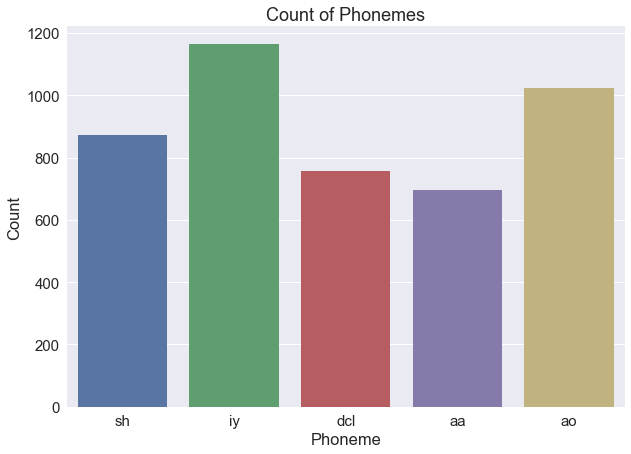

In [59]:
# Graph of the total counts of Phonemes. 
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]


plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale=1.5)
sns.color_palette(flatui)
ax = sns.countplot(x="g", data=df)
ax.set(ylabel='Count',
       xlabel='Phoneme',
       title='Count of Phonemes')

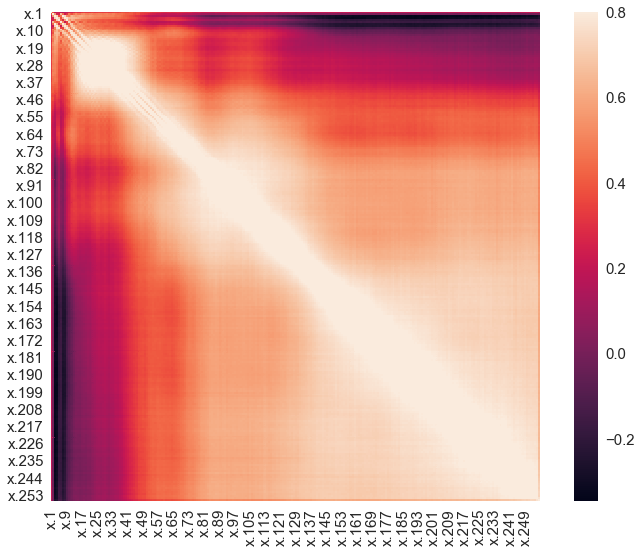

In [60]:
#correlation heatmap
corrmap = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmap, vmax=.8, square=True);

In [61]:
df.corr().head()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256
x.1,1.000000,0.381609,0.189072,0.223415,0.237694,0.199333,0.167783,0.204255,0.211074,0.261235,...,0.201464,0.197410,0.200707,0.206729,0.199516,0.204988,0.196088,0.196323,0.205685,0.179980
x.2,0.381609,1.000000,0.566498,0.257548,0.247554,0.645435,0.440540,0.231614,0.304453,0.483728,...,-0.014932,-0.024290,-0.014390,-0.001577,-0.009097,-0.014040,-0.009496,-0.001868,0.000375,-0.000142
x.3,0.189072,0.566498,1.000000,0.728690,0.371442,0.456808,0.811709,0.741022,0.517851,0.485396,...,-0.314674,-0.315218,-0.317457,-0.302305,-0.316005,-0.319730,-0.311703,-0.304184,-0.306382,-0.263589
x.4,0.223415,0.257548,0.728690,1.000000,0.710611,0.378469,0.619399,0.821228,0.762377,0.668170,...,-0.281551,-0.278138,-0.281670,-0.265253,-0.280111,-0.281832,-0.275719,-0.271394,-0.277089,-0.240917
x.5,0.237694,0.247554,0.371442,0.710611,1.000000,0.439367,0.283180,0.582308,0.786944,0.604508,...,-0.166641,-0.167491,-0.162458,-0.152075,-0.155903,-0.149769,-0.152591,-0.149079,-0.160124,-0.138613


# LDA Classifier

### Feature Set

In [72]:
X = df.drop(columns =  ['g', 'speaker']).values
y = df['g'].values

### Train-Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [74]:
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (3381, 256) (3381,)
Testing set: (1128, 256) (1128,)


### Training the Model

In [97]:
# Feature Scaling. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
lda = LinearDiscriminantAnalysis()

In [99]:
lda.fit(X_train, y_train)
lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

### Predict

In [100]:
y_pred = lda.predict(X_test)
y_pred

array(['sh', 'aa', 'iy', ..., 'ao', 'iy', 'dcl'], dtype='<U3')

### Accuracy Evaluation¶

Using accuracy classification score to compute subset accuracy. This function is equal to the Jaccard similarity score function. This computes how closely the actual labels and the predicted labels matched in the train set.

In [101]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, lda.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.9384797397219757
Test set Accuracy:  0.9273049645390071


In [102]:
lda.score(X_test, y_test)

0.9273049645390071

### Plot a Classification Report and Confusion Matrix

In [103]:
# classification report. 
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         aa       0.79      0.79      0.79       181
         ao       0.83      0.83      0.83       231
        dcl       0.99      0.98      0.99       196
         iy       0.99      0.99      0.99       290
         sh       1.00      1.00      1.00       230

avg / total       0.93      0.93      0.93      1128



In [104]:
# Plot a confusion matrix. 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

         aa       0.79      0.79      0.79       181
         ao       0.83      0.83      0.83       231
        dcl       0.99      0.98      0.99       196
         iy       0.99      0.99      0.99       290
         sh       1.00      1.00      1.00       230

avg / total       0.93      0.93      0.93      1128

Confusion matrix, without normalization
[[143  38   0   0   0]
 [ 39 192   0   0   0]
 [  0   0 193   3   0]
 [  0   0   2 288   0]
 [  0   0   0   0 230]]


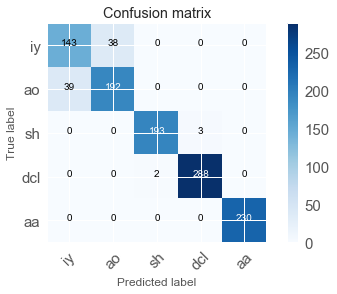

In [105]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['iy',
                                           'ao', 
                                           'sh',
                                           'dcl',
                                           'aa'],
                                            normalize= False,
                                            title='Confusion matrix')

Normalized confusion matrix
[[0.79 0.21 0.   0.   0.  ]
 [0.17 0.83 0.   0.   0.  ]
 [0.   0.   0.98 0.02 0.  ]
 [0.   0.   0.01 0.99 0.  ]
 [0.   0.   0.   0.   1.  ]]


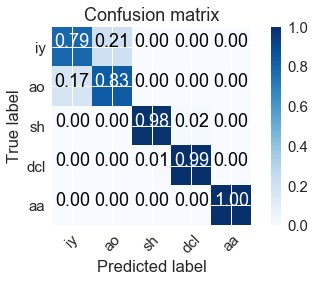

In [85]:
# Normalized confusion matrix to show percentages. 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['iy',
                                           'ao', 
                                           'sh',
                                           'dcl',
                                           'aa'],
                                            normalize= True,
                                            title='Confusion matrix')

### Cross Validation

In [166]:
# Normalize the data. 
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [167]:
scores = cross_val_score(lda, Xs, y, cv=5)

In [171]:
scores

array([0.93584071, 0.93141593, 0.94006659, 0.90444444, 0.91888889])

In [168]:
np.mean(scores)

0.9261313126352562

#### Cross validation actually gave a slightly lower score. 

### LDA with Shrinkage

In [109]:
ldas = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

In [110]:
ldas.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
              solver='lsqr', store_covariance=False, tol=0.0001)

In [111]:
y_preds = ldas.predict(X_test)
y_preds

array(['sh', 'aa', 'iy', ..., 'ao', 'iy', 'dcl'], dtype='<U3')

In [112]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, ldas.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, y_preds))

Train set Accuracy:  0.9372966577935522
Test set Accuracy:  0.9290780141843972


In [113]:
ldas.score(X_test, y_test)

0.9290780141843972

             precision    recall  f1-score   support

         aa       0.79      0.80      0.79       181
         ao       0.84      0.84      0.84       231
        dcl       0.99      0.98      0.99       196
         iy       0.99      0.99      0.99       290
         sh       1.00      1.00      1.00       230

avg / total       0.93      0.93      0.93      1128

Confusion matrix, without normalization
[[144  37   0   0   0]
 [ 38 193   0   0   0]
 [  0   0 193   3   0]
 [  0   0   2 288   0]
 [  0   0   0   0 230]]


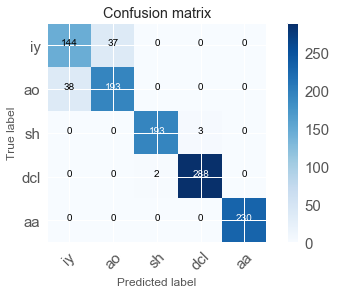

In [114]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_preds))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['iy',
                                           'ao', 
                                           'sh',
                                           'dcl',
                                           'aa'],
                                            normalize= False,
                                            title='Confusion matrix')

#### LDA with shrinkage basically preformed exactly the same as LDA without shrinkage. 